In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from typing import Dict
from src.data_loader import load_sp500_data
from src.indicators import calculate_rsi
from src.backtest import run_backtest
from src.signals import generate_signals



plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

In [13]:
data = load_sp500_data()
print("S&P 500 Data:")
display(data.head())



S&P 500 Data:


,close
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049


In [14]:
data['RSI'] = calculate_rsi(data['close'])
data = data.dropna()  
print("RSI added:")
display(data.head())

RSI added:


,close,RSI
Date,,
2020-01-22,3321.750000,71.663333
2020-01-23,3325.540039,72.682786
2020-01-24,3295.469971,55.593688
2020-01-27,3243.629883,38.700268
2020-01-28,3276.239990,49.164960


In [15]:
print(data.columns)

Index(['close', 'RSI'], dtype='object')


In [16]:
data['rsi'] = calculate_rsi(data['close'])
print("Data with RSI:")
display(data.dropna().head())

Data with RSI:


,close,RSI,rsi
Date,,,
2020-02-10,3352.090088,61.755985,59.989147
2020-02-11,3357.750000,62.583043,61.004805
2020-02-12,3379.449951,65.650164,64.704171
2020-02-13,3373.939941,64.210871,63.068092
2020-02-14,3380.159912,65.139970,64.169493


In [17]:
data = generate_signals(data)
print("Signals Generated:")
display(data[['close', 'rsi', 'signal', 'position']].head(10))

Signals Generated:


,close,rsi,signal,position
Date,,,,
2020-02-10,3352.090088,59.989147,0,0.0
2020-02-11,3357.750000,61.004805,0,0.0
2020-02-12,3379.449951,64.704171,0,0.0
2020-02-13,3373.939941,63.068092,0,0.0
2020-02-14,3380.159912,64.169493,0,0.0
2020-02-18,3370.290039,61.057827,0,0.0
2020-02-19,3386.149902,64.072652,0,0.0
2020-02-20,3373.229980,59.997708,0,0.0
2020-02-21,3337.750000,50.499453,0,0.0


In [18]:
results = run_backtest(data)
print(f"""
📊 Strategy Performance:
Sharpe Ratio: {results['sharpe']:.2f}
Max Drawdown: {results['max_drawdown']:.2%}
""")



📊 Strategy Performance:
Sharpe Ratio: -0.13
Max Drawdown: -45.13%



In [19]:
def plot_results(results: Dict) -> None:
    """Professional visualization of backtest results"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Equity Curve
    results['equity_curve'].plot(ax=ax1, label='Strategy')
    ax1.set_title(f"Equity Curve | Sharpe: {results['sharpe']:.2f}")
    ax1.set_ylabel('Cumulative Returns')
    ax1.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax1.legend()
    ax1.grid(True)
    
    # Price with Signals
    data = results['data']
    data['close'].plot(ax=ax2, label='Price', alpha=0.7)
    buy_signals = data[data['signal'] == 1]
    sell_signals = data[data['signal'] == -1]
    ax2.scatter(buy_signals.index, buy_signals['close'], 
               marker='^', color='green', label='Buy', alpha=0.7)
    ax2.scatter(sell_signals.index, sell_signals['close'],
               marker='v', color='red', label='Sell', alpha=0.7)
    ax2.set_title('Price with RSI Signals')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


In [20]:
performance_df = pd.DataFrame({
    'Metric': ['Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown', 
               'Total Return', 'Win Rate', 'Number of Trades'],
    'Value': [
        f"{results['sharpe']:.2f}",
        f"{results['sortino']:.2f}",
        f"{results['max_drawdown']:.2%}",
        f"{results['total_return']:.2%}",
        f"{results['win_rate']:.2%}",
        int(results['num_trades'])
    ]
}).set_index('Metric')

print("📊 Strategy Performance:")
display(performance_df)


📊 Strategy Performance:


,Value
Metric,
Sharpe Ratio,-0.13
Sortino Ratio,-0.18
Max Drawdown,-45.13%
Total Return,-17.29%
Win Rate,20.00%
Number of Trades,9


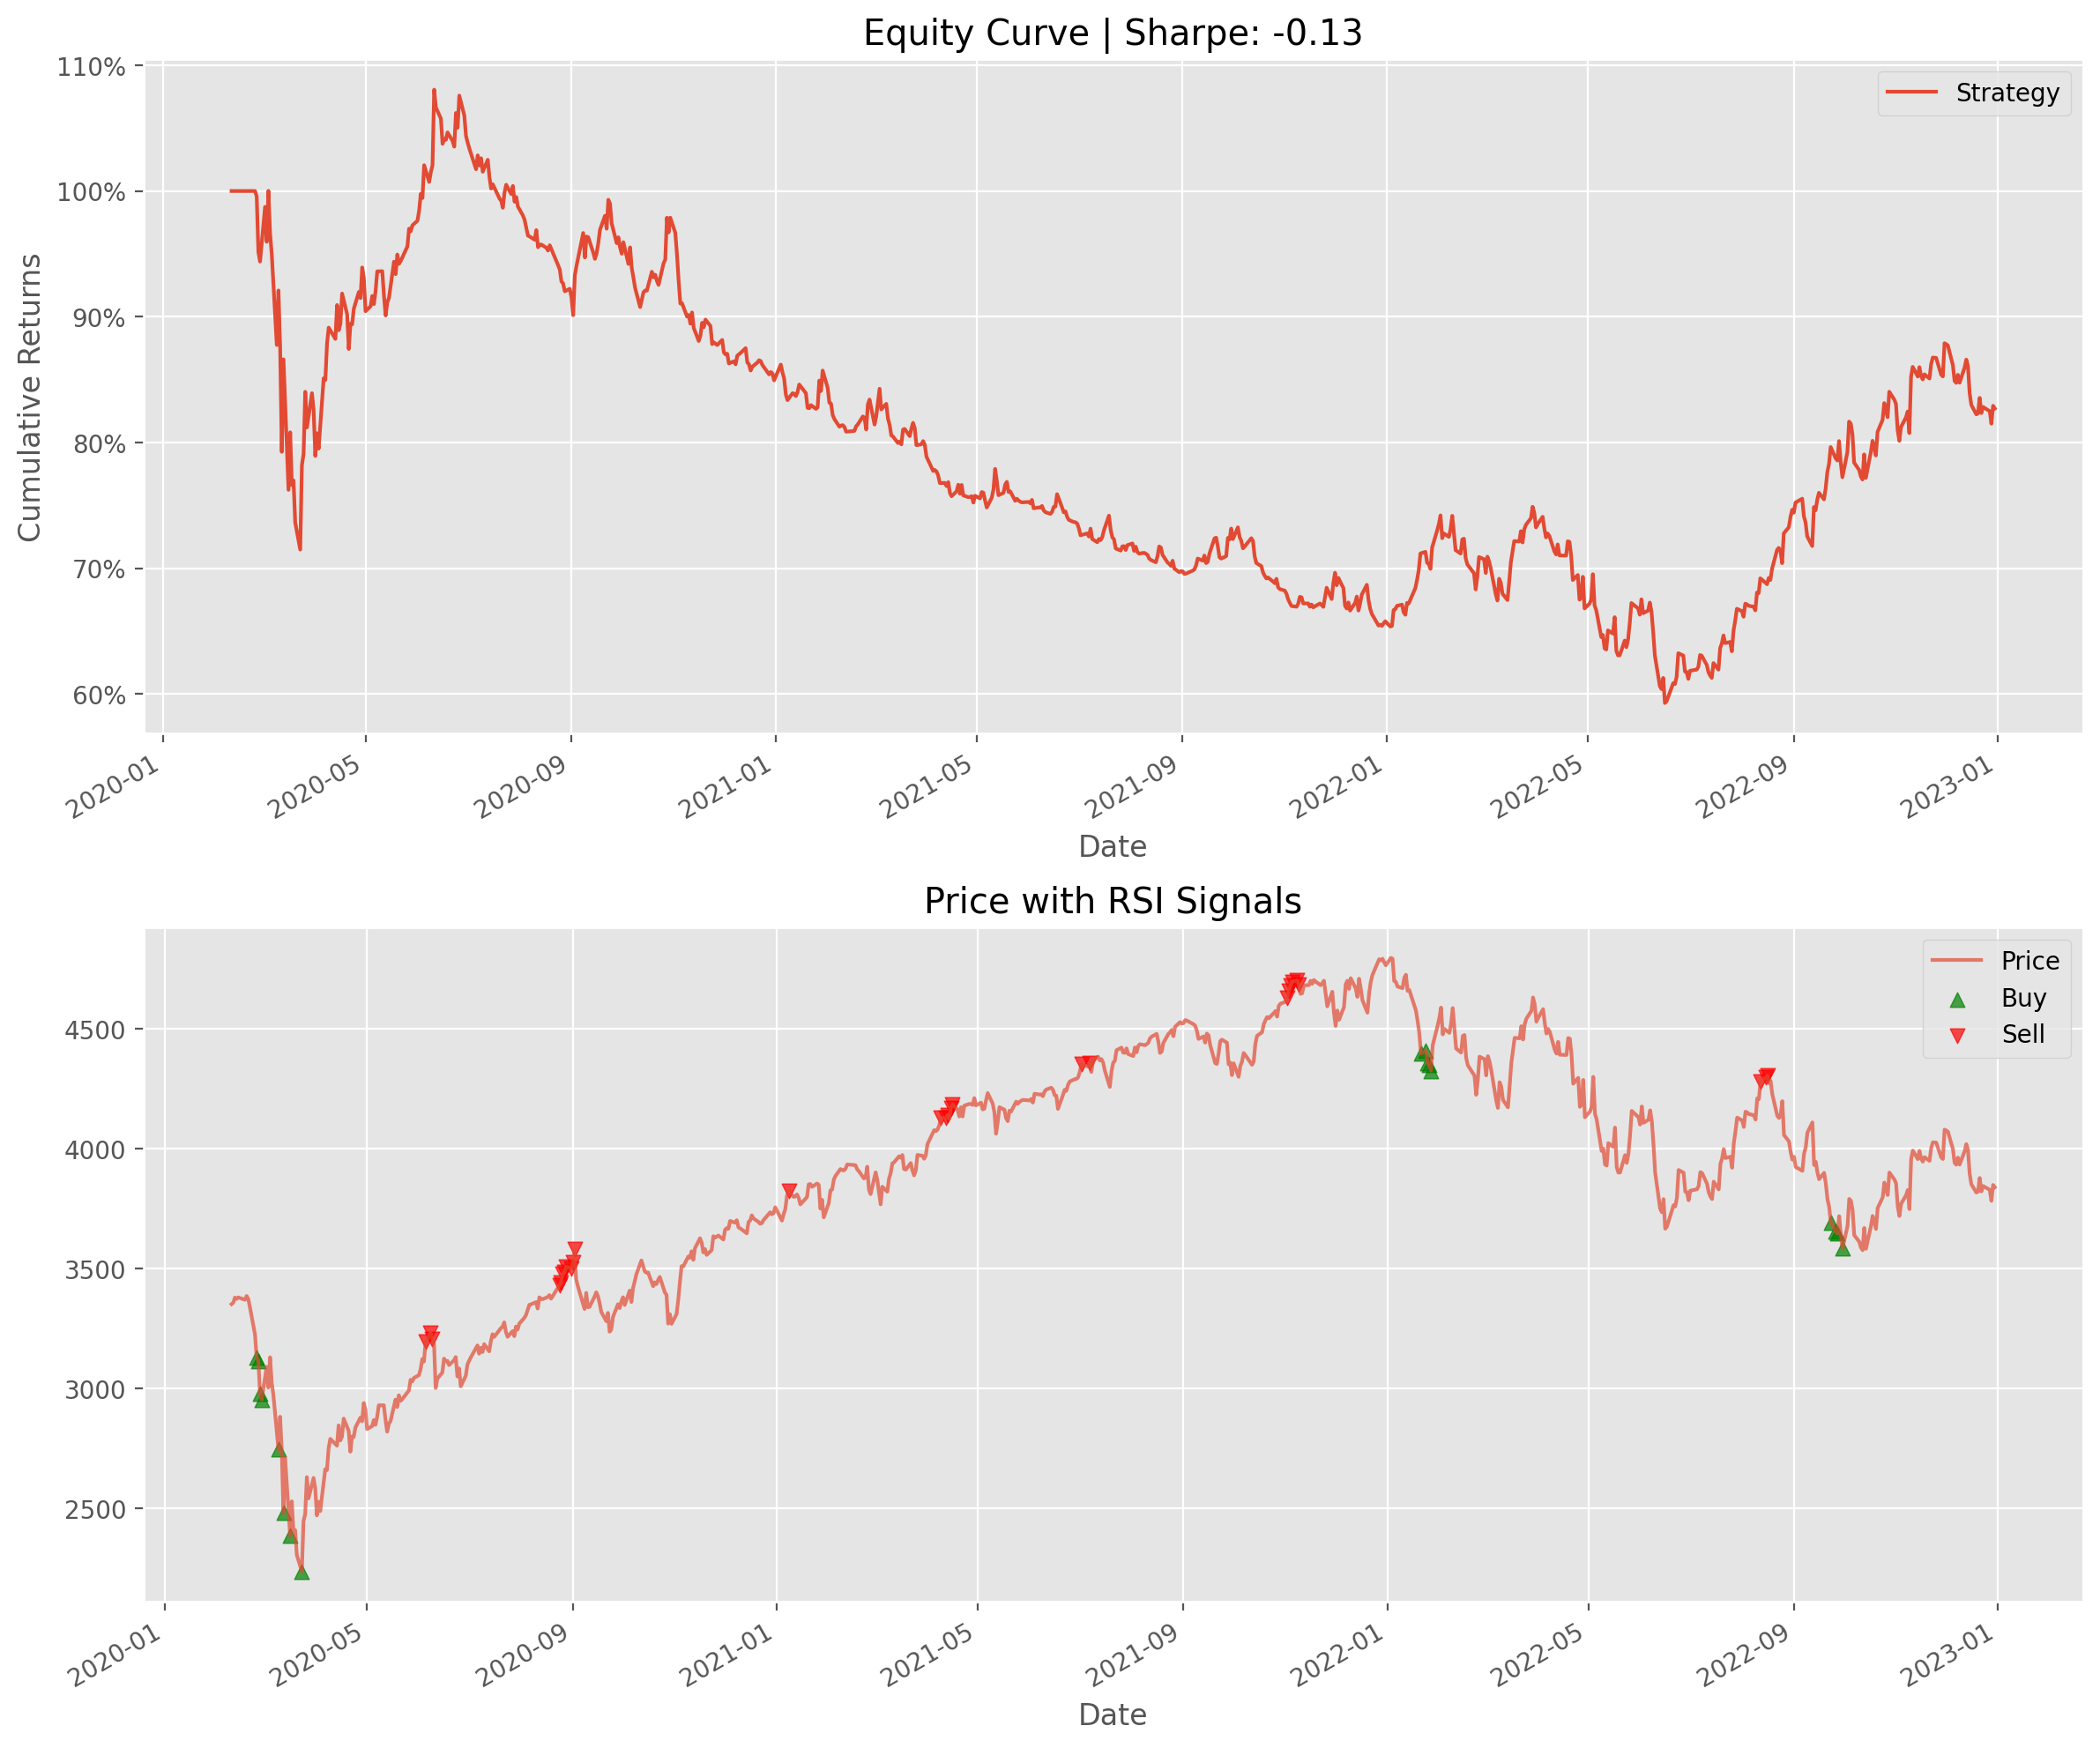

In [21]:
plot_results(results)